     
<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" alt="Smiley face" height="210" width="210">


## ISRAEL CASTILLO HERRERA
## IF708348

>## <font color ='red'> **Tarea** 
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique en una gráfica el historias 100 muestras generadas y comparela con la función de densidad de probabilidad  $f(x)$, esto con el fín de validar que el procedimiento fue realizado de manera correcta. Ver el procedimiento ilustrado en las figuras anteriores

In [3]:
import numpy as np
import matplotlib.pyplot as plt

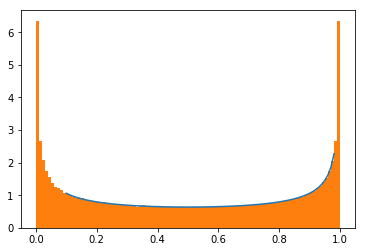

In [4]:


N = 10**6
def d_fun(N):
    U= np.random.rand(N)
    return np.sin(np.pi*U/2)**2

f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
x = np.arange(.1,.99,.01)

d = d_fun(N)

plt.plot(x,f(x))
plt.hist(d, bins=100, density=True)
plt.show()


La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

$$Demostración$$
\
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
\
$$P(i+1) = \frac{n!}{(i+1)!(n-i-1)!} \cdot p^{i+1}(1-p)^{n-i-1}$$
\
$$ = \frac{n!\ p^{i+1}\ (1-p)^{n-i-1}}{(i+1)!\ (n-i-1)!}$$
\
$$ = \frac{n!\ p^{i}\ \cdot p\ (1-p)^{-1}\ (1-p)^{n-i}}{(i+1)!\ (n-i-1)!}$$
\
$$Resolvemos\ algunos\ de\ los\ factoriales$$
\
$$ = \frac{n!\ p^{i} \cdot \ p\ \cdot (1-p)^{-1}\ (1-p)^{n-i}}{(i+1)\ (i+1-1)!\ (n-i-1)!}$$
\
$$Ordenamos$$
\
$$ = \frac{n!\ p\ \cdot p^{i}\ (1-p)^{n-i}}{(i+1)\ (i+1-1)!\ (n-i-1)!\ (1-p)}$$
\
$$Donde$$
$$(n-i)! = (n-i)(n-i-1)!$$
\
$$(n-i-1)! = \frac{(n-i)!}{(n-i)}$$
\
$$Entonces$$
\
$$ = \frac{n!\ p\ \cdot p^{i}\ (1-p)^{n-i}\ (n-i)}{(i+1)\ (i+1-1)!\ (n-i)!\ (1-p)}$$
\
$$Ordenamos$$
\
$$ =  \frac{p\ \cdot (n-i)}{(i+1)\ (1-p)} \cdot \frac{n! \cdot p^{i}\ (1-p)^{n-i}}{i!\ (n-i)!} $$
\
$$ P_{i+1}=  \frac{(n-i) \cdot p }{(i+1)\ (1-p)} \cdot p_{i} $$

**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$$Demostración$$
\
$$P(k, \lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!} = P(k)$$
\
$$Donde$$ 
\
$$k! = k \cdot (k-1)! $$

\
$$P(k+1) = \frac{e^{-\lambda} \lambda^{k+1}}{(k+1)(k-1+1)!}$$

\
$$ = \frac{e^{-\lambda}\lambda^{k}\cdot\lambda}{(k+1)\cdot k!}$$
\
$$Reordenamos$$
\
$$ P(k+1) = \frac{\lambda}{(k+1)} \cdot \frac{e^{-\lambda}\lambda^{k}}{k!}$$


\
$$ P(k+1) = \frac{\lambda}{(k+1)} P(k)$$

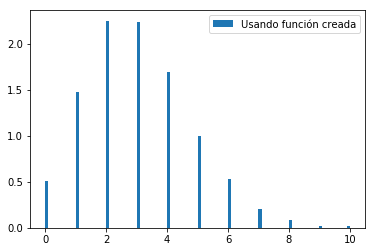

In [35]:
# Función que calcula la probabilidad acumulada optimizada
def Poisson(l,k):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]= l/(i+1) * Pr[i]
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)


l = 3
k = 10
n=10000

p_acum = Poisson(l,k)
u = np.random.rand(n)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(n)))

# Gráfica de resultados
plt.hist(d_poisson,100,density=True,label='Usando función creada')
plt.legend()


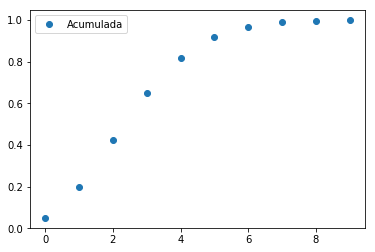

In [33]:
plt.plot(p_acum, "o",label="Acumulada")
plt.legend()

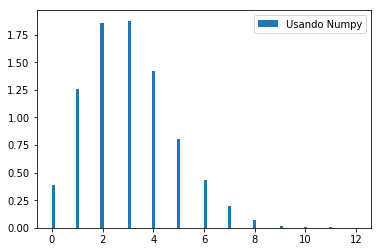

In [23]:
d_Pos_numpy = np.random.poisson(lam=l,size = n)
plt.hist(d_Pos_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()